<b> Problem Statement: </b>The term hate speech is understood as any type of verbal, written or behavioural communication that attacks or uses derogatory or discriminatory language against a person or group based on what they are, in other words, based on their religion, ethnicity, nationality, race, colour, ancestry, sex or another identity factor. In this problem, We will take you through a hate speech detection model with Machine Learning and Python.

Hate Speech Detection is generally a task of sentiment classification. So for training, a model that can classify hate speech from a certain piece of text can be achieved by training it on a data that is generally used to classify sentiments. So for the task of hate speech detection model, We will use the Twitter tweets to identify tweets containing  Hate speech.

<img style="width:70px; height:70px; float:left;" src="https://cliply.co/wp-content/uploads/2021/09/CLIPLY_372109260_TWITTER_LOGO_400.gif"><img style="width:70px; height:70px; float:right;" src="https://cliply.co/wp-content/uploads/2021/09/CLIPLY_372109260_TWITTER_LOGO_400.gif"><h2 style="background-color:black; color:white; text-align:center;"><b>Part 1: Import Twitter Hate Speech Data and Analyze</b></h2>


### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries</font>

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
import string
from nltk.text import Text

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Import Dataset</font>

In [2]:
df = pd.read_csv('Twitter_Hate_Speech.csv')
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.3: </font> <font color = #41EA46> Data Information</font>

####  <font color = blue> 1.3.1: How many numbers of observations and features</font>

In [3]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 3


####  <font color = blue> 1.3.2: Features that we have in this data</font>

In [4]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

#### <font color = blue> 1.3.3: Type of Data</font>

In [5]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

#### <font color = blue> 1.3.4: Data Info</font>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


#### <font color = blue> 1.3.5: Data Size</font>

In [7]:
df.size

95886

#### <font color = blue> 1.3.6: Predictor and Target Attribute</font>

In [8]:
# Predictor Attribute
text = df.iloc[:, 1:]
text.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


In [9]:
# target Attribute
label = df.iloc[:, 0:1]
label.tail()

,id
31957,31958
31958,31959
31959,31960
31960,31961
31961,31962


#### <font color = blue> 1.3.7: Check the Missing Value</font>

In [10]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

#### <font color = blue> 1.3.8: Extracting the Target Attribute for Each Class and Visualize

In [11]:
# Extract the Label Feature for Each Class
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


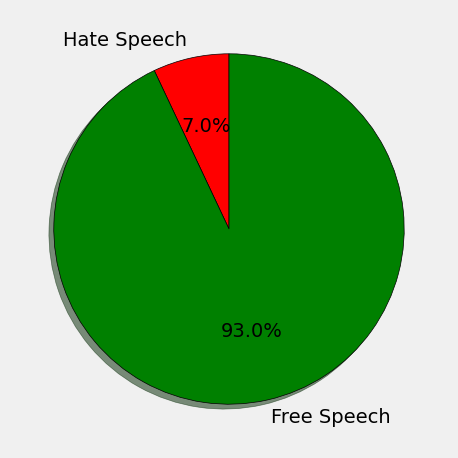

In [12]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green'])

plt.tight_layout()
plt.show()

<h2 style="background-color:black; color:white; text-align:center;"><b><i>Part 2: Data Preprocessing</i></b></h2>

In this part, we did data preprocessing. firstly, we did text cleaning with the help of Regular Expression and then we apply preprocessing operations like Tokenization to make a token of each sentence, then remove stop words like "the", "a", "at" etc and then apply stemming to reducing a word to its word stem. After that, we apply the IF-IDF model for feature extraction and we took 2000 most frequent words from dictionaries. In the end, we split our data for training and testing. And ratio for training and testing is 0.8 and 0.2 respectively. 
    
### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Text Cleaning </font>
> <b>Lowercase <br> Remove Punctuation <br> Remove Urls <br> Removing @tags <br> Remove Special Characters </b>

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue>2.1.1: Lower Case

In [13]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

#### <font color = blue>2.1.2: Remove Punctuation

In [14]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

#### <font color = blue>2.1.3: Remove URLs

In [15]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

#### <font color = blue>2.1.4: Removing @tags

In [16]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

df['tweet'] = df['tweet'].apply(remove_tag)

#### <font color = blue>2.1.5: Remove Special Characters

In [17]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['tweet'] = df['tweet'].apply(remove_special)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)